In [2]:
import numpy as np

# 从文件读入数据集和标签向量

In [5]:
def loadDataSet():
    dataMat = [];
    labelMat =[]
    
    fr = open('testSet.txt')
    for line in fr.readlines():
        lineArr = line.strip().split()
        dataMat.append([1.0,float(lineArr[0]),float(lineArr[1])])
        labelMat.append(int(lineArr[2]))
    return dataMat,labelMat

In [6]:
def sigmoid(inX):
    return 1.0/(1+np.exp(-inX))

In [13]:
def gradAscent(dataMatIn, classLabels):
    #将数据向量转换为矩阵
    dataMatrix = np.mat(dataMatIn)
    labelMat = np.mat(classLabels).transpose()
    
    m,n = np.shape(dataMatrix)
    #初始化
    alpha = 0.001           #向目标移动的步长
    maxCycles = 500         #循环迭代次数
    weights = np.ones((n,1))
    print("weighs:",weights)
    #print("dataMatrix:",dataMatrix)
    return
    for k in range(maxCycles):
        h = sigmoid(dataMatrix*weights)
        #print(h)
        error = labelMat - h
        weights = weights + alpha*dataMatrix.transpose()*error
        
    return weights


In [14]:
dataArr,labelMat = loadDataSet()


In [15]:
weigs =gradAscent(dataArr,labelMat)
print(weigs)

weighs: [[1.]
 [1.]
 [1.]]
None


In [49]:
def plotBestFit(wei):
    import matplotlib.pyplot as plt
    weights = wei.getA()
    dataMat,labelMat = loadDataSet()
    dataArr = np.array(dataMat)
    n = np.shape(dataArr)[0]
    xcord1 = []; ycord1=[]
    xcord2 = []; ycord2=[]
    for i in range(n):
        if int(labelMat[i]) == 1:
            xcord1.append(dataArr[i,1])
            ycord1.append(dataArr[i,2])
        else:
            xcord2.append(dataArr[i,1])
            ycord2.append(dataArr[i,2])
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.scatter(xcord1,ycord1,s=30,c='red',marker='s')
    ax.scatter(xcord2,ycord2,s=30,c='blue')
    #x=range(-3.0,3.0,1)
    x = np.arange(-3.0,3.0,0.1)
    y = (-weights[0]-weights[1]*x)/weights[2]
    ax.plot(x,y)
    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.show()

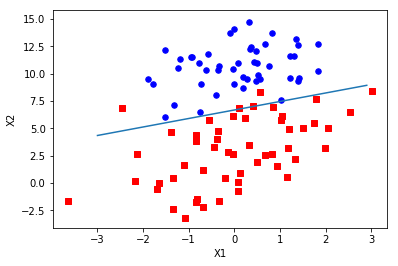

In [50]:
plotBestFit(weigs)